In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv('./Plane Price.csv')
df.shape

(517, 16)

In [5]:
df.head()

,Model Name,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
0,100 Darter (S.L. Industries),Piston,145,104,91.0,46.0,36,450,900.0,1300.0,"2,050","1,180",25/3,37/5,370,1300000.0
1,7 CCM Champ,Piston,85,89,83.0,44.0,15,600,720.0,800.0,"1,350",820,20/7,36/1,190,1230000.0
2,100 Darter (S.L. Industries),Piston,90,90,78.0,37.0,19,650,475.0,850.0,"1,300",810,21/5,35/0,210,1600000.0
3,7 AC Champ,Piston,85,88,78.0,37.0,19,620,500.0,850.0,"1,300",800,21/5,35/0,210,1300000.0
4,100 Darter (S.L. Industries),Piston,65,83,74.0,33.0,14,370,632.0,885.0,"1,220",740,21/5,35/0,175,1250000.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Model Name               517 non-null    object 
 1   Engine Type              517 non-null    object 
 2   HP or lbs thr ea engine  517 non-null    object 
 3   Max speed Knots          497 non-null    object 
 4   Rcmnd cruise Knots       507 non-null    float64
 5   Stall Knots dirty        502 non-null    float64
 6   Fuel gal/lbs             517 non-null    int64  
 7   All eng rate of climb    513 non-null    object 
 8   Eng out rate of climb    491 non-null    float64
 9   Takeoff over 50ft        492 non-null    float64
 10  Landing over 50ft        517 non-null    object 
 11  Empty weight lbs         516 non-null    object 
 12  Length ft/in             517 non-null    object 
 13  Wing span ft/in          517 non-null    object 
 14  Range N.M.               4

In [7]:
df.isnull().all()

Model Name                 False
Engine Type                False
HP or lbs thr ea engine    False
Max speed Knots            False
Rcmnd cruise Knots         False
Stall Knots dirty          False
Fuel gal/lbs               False
All eng rate of climb      False
Eng out rate of climb      False
Takeoff over 50ft          False
Landing over 50ft          False
Empty weight lbs           False
Length ft/in               False
Wing span ft/in            False
Range N.M.                 False
Price                      False
dtype: bool

#### Observations
1. Most of the columns have non-null values close to the total number of entries, suggesting that the dataset is relatively complete. However, some columns do have missing values:
    1. "Max speed Knots" has 20 missing values (497 non-null out of 517).
    2. "Rcmd cruise Knots" has 15 missing values (502 non-null out of 517).
    3. "All eng rate of climb" and "Eng out rate of climb" each have 4 missing values (513 non-null out of 517).
    4. "Takeoff over 50ft" has 25 missing values (492 non-null out of 517).
    5. "Range N.M." has 18 missing values (499 non-null out of 517).
    6. "Price" has 10 missing values (507 non-null out of 517).
2. The output of the df.isnull().all() command suggests that there is no single column where all rows are missing; every column contains some data.

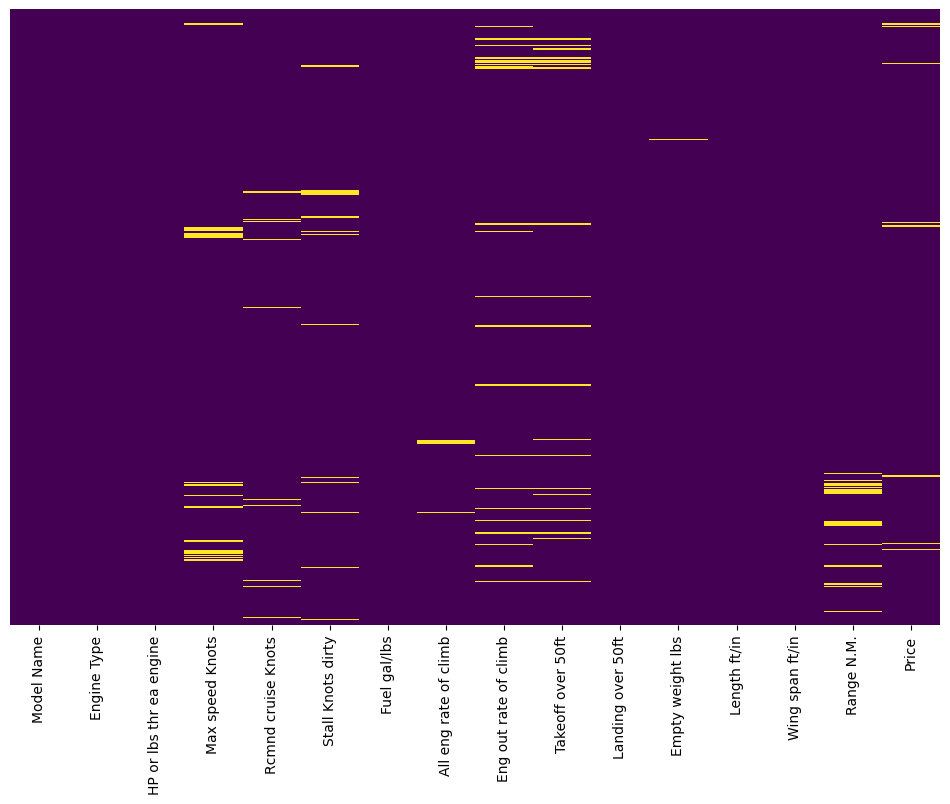

In [8]:
# Create a boolean DataFrame where True indicates a missing value
missing = df.isnull()

plt.figure(figsize=(12, 8))

# Draw a heatmap with the boolean values
sns.heatmap(missing, cbar=False, yticklabels=False, cmap='viridis')

plt.show()

In [9]:
df = df.dropna()

In [10]:
df.shape

(421, 16)

In [11]:
columns_to_convert = ['HP or lbs thr ea engine', 'Max speed Knots', 'All eng rate of climb', 'Landing over 50ft', 'Empty weight lbs', 'Length ft/in', 'Wing span ft/in', 'Range N.M.']

for column in columns_to_convert:
    df[column] = df[column].str.replace(',', '').str.extract('(\d+)').astype(float)

In [12]:
df = df.drop(['Model Name','Engine Type'],axis=1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 421 entries, 0 to 516
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   HP or lbs thr ea engine  421 non-null    float64
 1   Max speed Knots          421 non-null    float64
 2   Rcmnd cruise Knots       421 non-null    float64
 3   Stall Knots dirty        421 non-null    float64
 4   Fuel gal/lbs             421 non-null    int64  
 5   All eng rate of climb    421 non-null    float64
 6   Eng out rate of climb    421 non-null    float64
 7   Takeoff over 50ft        421 non-null    float64
 8   Landing over 50ft        421 non-null    float64
 9   Empty weight lbs         421 non-null    float64
 10  Length ft/in             421 non-null    float64
 11  Wing span ft/in          421 non-null    float64
 12  Range N.M.               421 non-null    float64
 13  Price                    421 non-null    float64
dtypes: float64(13), int64(1)
memory

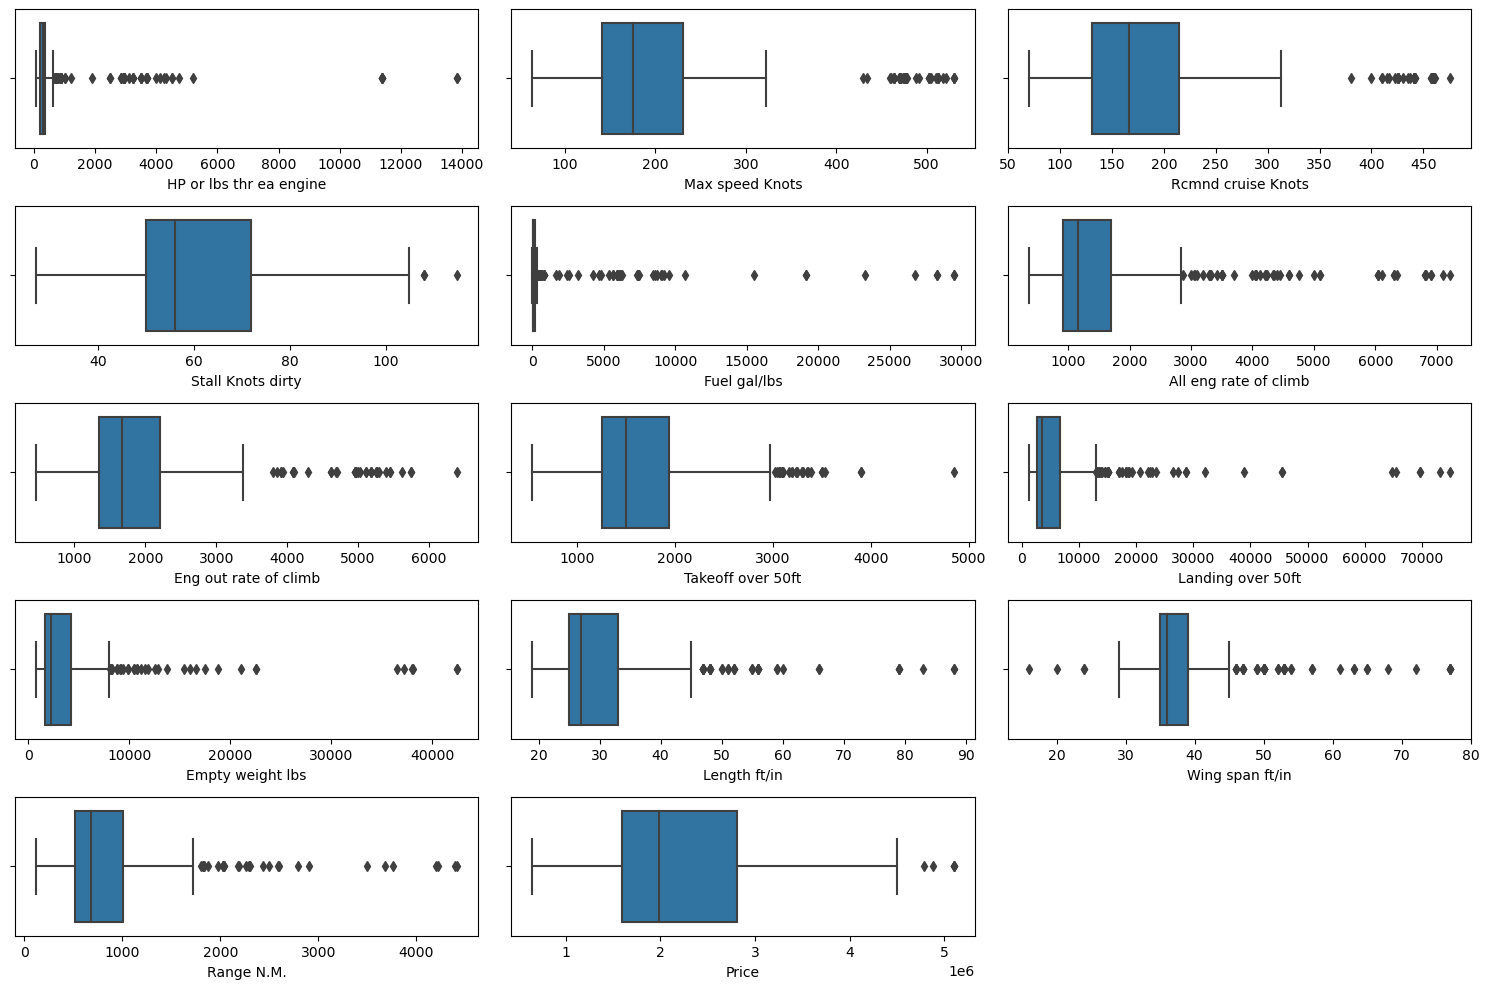

In [14]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(15, 10))

for i, column in enumerate(numeric_columns):
    plt.subplot(len(numeric_columns.columns) // 3 + 1, 3, i + 1)
    sns.boxplot(x=numeric_columns[column])

plt.tight_layout()
plt.show()

In [15]:
def is_outliers(df, n, data):
    outlier_indices = []

    for column in data:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        outlier_step = 1.5 * IQR


        outliers_col = df[(df[column] < Q1 - outlier_step) | 
                          (df[column] > Q3 + outlier_step)].index
        outlier_indices.extend(outliers_col)

    outlier_indices = pd.Series(outlier_indices).value_counts()
    multiple_outliers = outlier_indices[outlier_indices > n].index.tolist()

    print('Total number of identified outliers is:', len(multiple_outliers))

    return multiple_outliers


multiple_outliers = is_outliers(df, 1, numeric_columns)
df_clean = df.drop(multiple_outliers, axis = 0).reset_index(drop=True)


Total number of identified outliers is: 80


In [16]:
def calculate_outliers(df, numeric_columns):
    outlier_percentages = {}


    for column in numeric_columns:

        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[column][(df[column] < lower_bound) | (df[column] > upper_bound)]
        

        percent_outliers = (outliers.count() / df[column].count()) * 100
        outlier_percentages[column] = percent_outliers


    for column, percent_outliers in outlier_percentages.items():
        print(f"{column}: {percent_outliers:.2f}% outliers")

In [17]:
calculate_outliers(df, numeric_columns)

HP or lbs thr ea engine: 17.34% outliers
Max speed Knots: 10.21% outliers
Rcmnd cruise Knots: 10.93% outliers
Stall Knots dirty: 0.71% outliers
Fuel gal/lbs: 19.71% outliers
All eng rate of climb: 11.40% outliers
Eng out rate of climb: 8.55% outliers
Takeoff over 50ft: 6.65% outliers
Landing over 50ft: 10.69% outliers
Empty weight lbs: 8.79% outliers
Length ft/in: 9.03% outliers
Wing span ft/in: 12.35% outliers
Range N.M.: 7.36% outliers
Price: 1.19% outliers


In [18]:
calculate_outliers(df_clean, numeric_columns)

HP or lbs thr ea engine: 1.76% outliers
Max speed Knots: 0.00% outliers
Rcmnd cruise Knots: 0.00% outliers
Stall Knots dirty: 0.59% outliers
Fuel gal/lbs: 8.21% outliers
All eng rate of climb: 1.76% outliers
Eng out rate of climb: 0.59% outliers
Takeoff over 50ft: 4.69% outliers
Landing over 50ft: 5.28% outliers
Empty weight lbs: 5.28% outliers
Length ft/in: 2.05% outliers
Wing span ft/in: 10.85% outliers
Range N.M.: 2.05% outliers
Price: 0.00% outliers


## Standardization

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_data = scaler.fit_transform(df_clean)
df_scaled = pd.DataFrame(scaled_data, columns=df_clean.columns)

df_scaled.head()

,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
0,-1.074262,-1.411009,-1.515693,-0.835555,-0.751951,-1.771028,-1.444900,-0.342781,-0.921364,-0.962763,-0.465688,0.274156,-1.063865,-1.108719
1,-1.728567,-1.747292,-1.704299,-1.021476,-1.094752,-1.365488,-1.816007,-1.507450,-1.304306,-1.274622,-1.765194,0.036275,-1.769888,-1.231930
2,-1.674041,-1.724873,-1.822178,-1.672200,-1.029457,-1.230307,-2.321126,-1.390983,-1.331659,-1.283285,-1.505293,-0.201606,-1.691441,-0.580672
3,-1.728567,-1.769711,-1.822178,-1.672200,-1.029457,-1.311415,-2.269583,-1.390983,-1.331659,-1.291948,-1.505293,-0.201606,-1.691441,-1.108719
4,-1.946668,-1.881805,-1.916481,-2.044043,-1.111076,-1.987317,-1.997438,-1.309456,-1.375424,-1.343924,-1.505293,-0.201606,-1.828723,-1.196727


## Training

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df_scaled.drop(columns='Price', axis=1)
Y =  df_scaled['Price']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [21]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [22]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

gb_model.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

## Evaluation

In [23]:
# Mean Accuracy
print(model.score(X_test, y_test))
print(rf_model.score(X_test, y_test))
print(gb_model.score(X_test, y_test))

0.8373545839971805
0.8942538740866578
0.8687824190690842


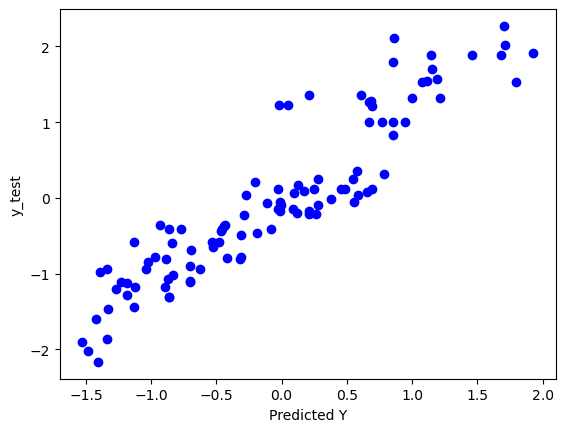

In [24]:
prediction = model.predict(X_test)
plt.scatter(prediction ,y_test, c='b')
plt.xlabel('Predicted Y')
plt.ylabel('y_test')
plt.show()

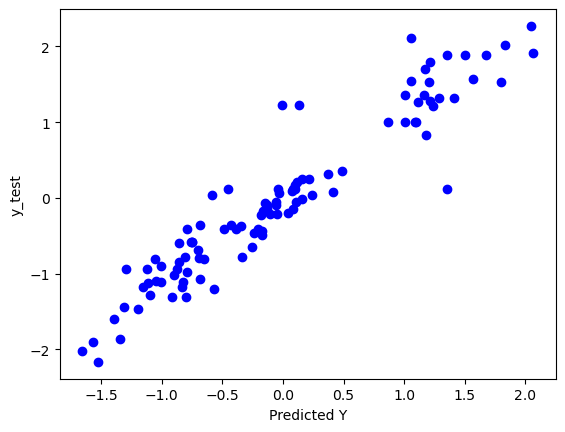

In [25]:
prediction = rf_model.predict(X_test)
plt.scatter(prediction ,y_test, c='b')
plt.xlabel('Predicted Y')
plt.ylabel('y_test')
plt.show()

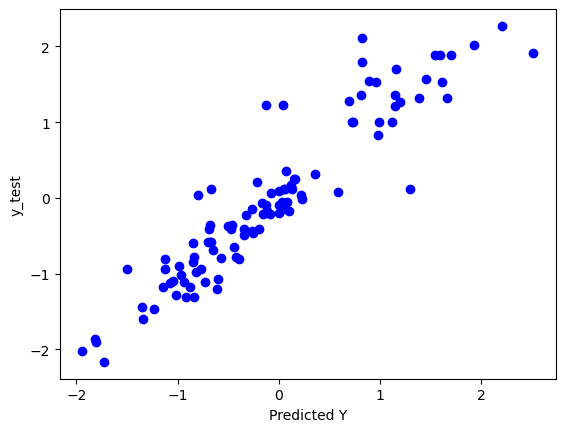

In [26]:
prediction = gb_model.predict(X_test)
plt.scatter(prediction ,y_test, c='b')
plt.xlabel('Predicted Y')
plt.ylabel('y_test')
plt.show()

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


param_grid = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [None, 10, 20, 30], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False] 
}

# Initialize the base model
rf = RandomForestRegressor(random_state=42)

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# grid_search.best_params_ contains the best parameters found during the search
print("Best parameters found: ", grid_search.best_params_)

# You can now use the best estimator directly to make predictions
best_rf = grid_search.best_estimator_
# best_rf.predict(X_test) to make predictions on the test set


Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; tota